In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.Name = label.fit_transform(df.Name)
df.Gender = label.fit_transform(df.Gender)

In [5]:
df.median(axis=0)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Name           445.0000
Gender           1.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [6]:
df.Age = df.Age.fillna("28")

In [7]:
x = df.drop("Gender",axis=1)
y = df.Gender

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(x_train,y_train)

F:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred = model.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm


array([[ 71,  37],
       [ 21, 139]], dtype=int64)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'predicted values')

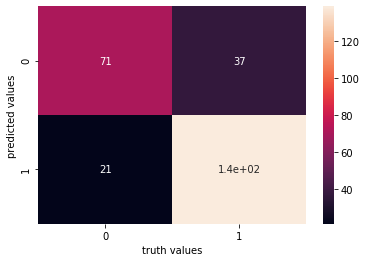

In [14]:
sns.heatmap(cm,annot=True)
plt.xlabel("truth values")
plt.ylabel("predicted values")

In [34]:
model.score(x_train,y_train)

0.7913322632423756